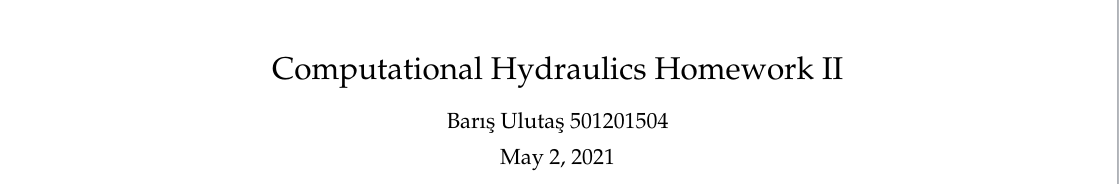

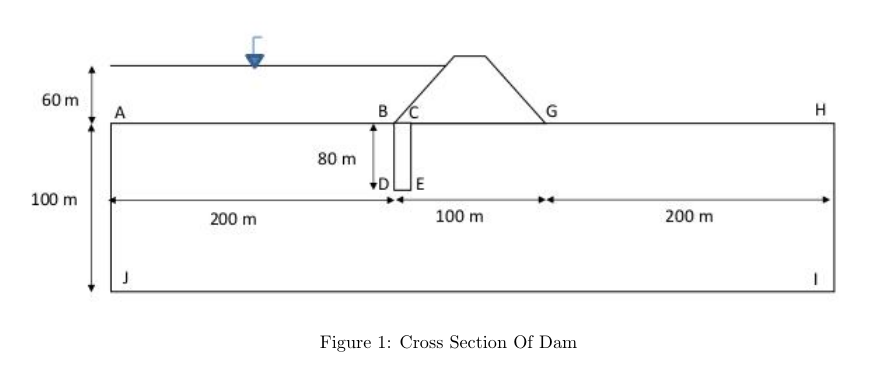

 According to the cross section which is shown in Figure 1, the seepage under the dam was examined. Potential function values and velocities of the water flow under the dam were calculated considering the boundary and initial conditions. Potential values matrix is calculated by Laplace equation. Laplace equation is numerically calculated using the finite difference method in this python notebook.

In [44]:
#Necessary Libraries installed
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [45]:
# Set the grid size
dx1 = 10
dy1 = 10
#Length of x and y axes
xl = 500
yl = 100
# Create a function to get psi field
def get_num_psi(dx):
    # get the grid point number
    jmax = int(xl/dx)+1
    imax = int(yl/dx)+1
    # Initialise the mesh with zeros
    psi = np.zeros((imax, jmax))
    #Boundary conditions
    #Only the places with 1 are entered, the remaining places are default 0
    psi[:, 0] = 1 
    psi[0,0:20]=1
    atol, iteration, sum_resid = 1e-9, 0, 1
    a, b, c, d, e = 0.01, 0.01, 0.01, 0.01, -0.04
    while sum_resid > atol:
        psi_in = psi[1:imax-1, 1:jmax-1]
        ij_field = np.fromfunction(lambda i, j: i+j, psi_in.shape)
        io, jo = np.where(ij_field%2 == iteration%2)
        i, j = io+1, jo+1
        cnt = len(i)
        resid = np.zeros(psi.shape)
        resid[i, j] = a*psi[i+1, j]+b*psi[i-1,j]+c*psi[i,j+1]+d*psi[i,j-1]+e*psi[i,j]
        psi[i, j] = psi[i, j]-resid[i, j]/e
        resid_m = np.sum(np.abs(resid))
        sum_resid = (sum_resid+resid_m)/cnt
        iteration += 1
        
    return psi
psi1=get_num_psi(10)
psi1[-1:,:]=psi1[9,:]
psi1[0,:]=psi1[1,:]
psi1[:,0]=psi1[:,1]

Potential values calculated with FDM in the created Psi matrix are shown in the colormap below.

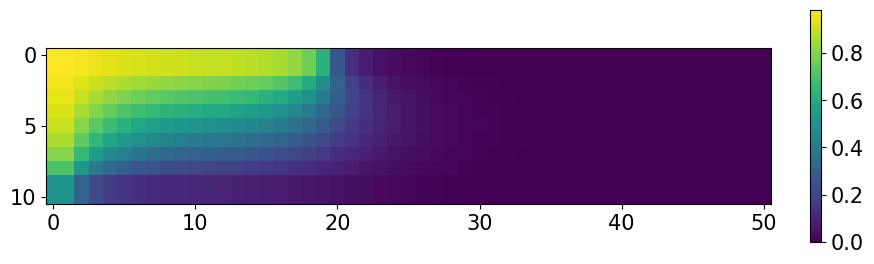

In [46]:
plt.figure(figsize=(10, 5), dpi=100)
plt.rcParams.update({'font.size': 15})
im=plt.imshow(psi1)
plt.colorbar(im,fraction=0.015, pad=0.05)
plt.savefig("potential.pdf")



Streamlines are drawn as follows:

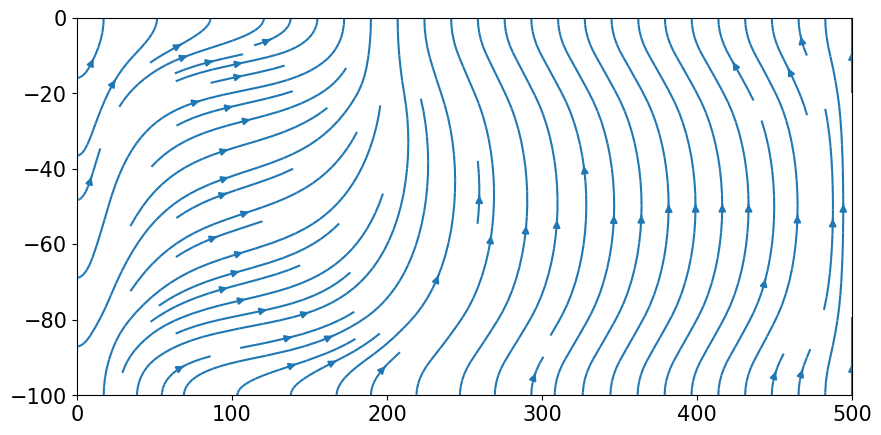

In [48]:
plt.figure(figsize=(10, 5), dpi=100)
plt.rcParams.update({'font.size': 15})
u, v = np.gradient(psi1)
x=np.linspace(0,500,51)
y=np.linspace(0,-100,11)
X, Y = np.meshgrid(x, y)
plt.streamplot(X, Y, -u, -v)
plt.savefig("stream.pdf")